## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
print("Data set size:")
df.shape

Data set size:


(255347, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
print("Observing Default Values:")
df['Default'].value_counts()

Observing Default Values:


0    225694
1     29653
Name: Default, dtype: int64

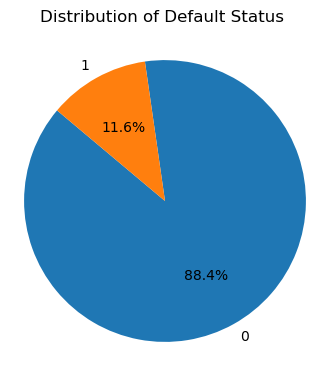

In [9]:
plt.figure(figsize=(4, 4))
output_counts = df['Default'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Default Status \n')
plt.ylabel('')

plt.show()

In [10]:
print("Observing Age Values:")
df['Age'].describe()

Observing Age Values:


count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

In [11]:
def age_group(age):
    if age < 18:
        return '<18'
    elif age >= 18 and age <=30:
        return 'Between 18 and 30'
    elif age >= 31 and age <=40:
        return 'Between 31 and 40'
    elif age >= 41 and age <=50:
        return 'Between 41 and 50'
    elif age >= 51 and age <=60:
        return 'Between 51 and 60'
    elif age >= 61 and age <=70:
        return 'Between 61 and 70'
    else:
        return 'Greater than 70'

print("Observing Age Values by buckets:", '\n')
df['age_buckets'] = df['Age'].apply(age_group)
print(df['age_buckets'].value_counts())

Observing Age Values by buckets: 

Between 18 and 30    63577
Between 31 and 40    49593
Between 41 and 50    49003
Between 51 and 60    48972
Between 61 and 70    44202
Name: age_buckets, dtype: int64


Countplot for numerical features:


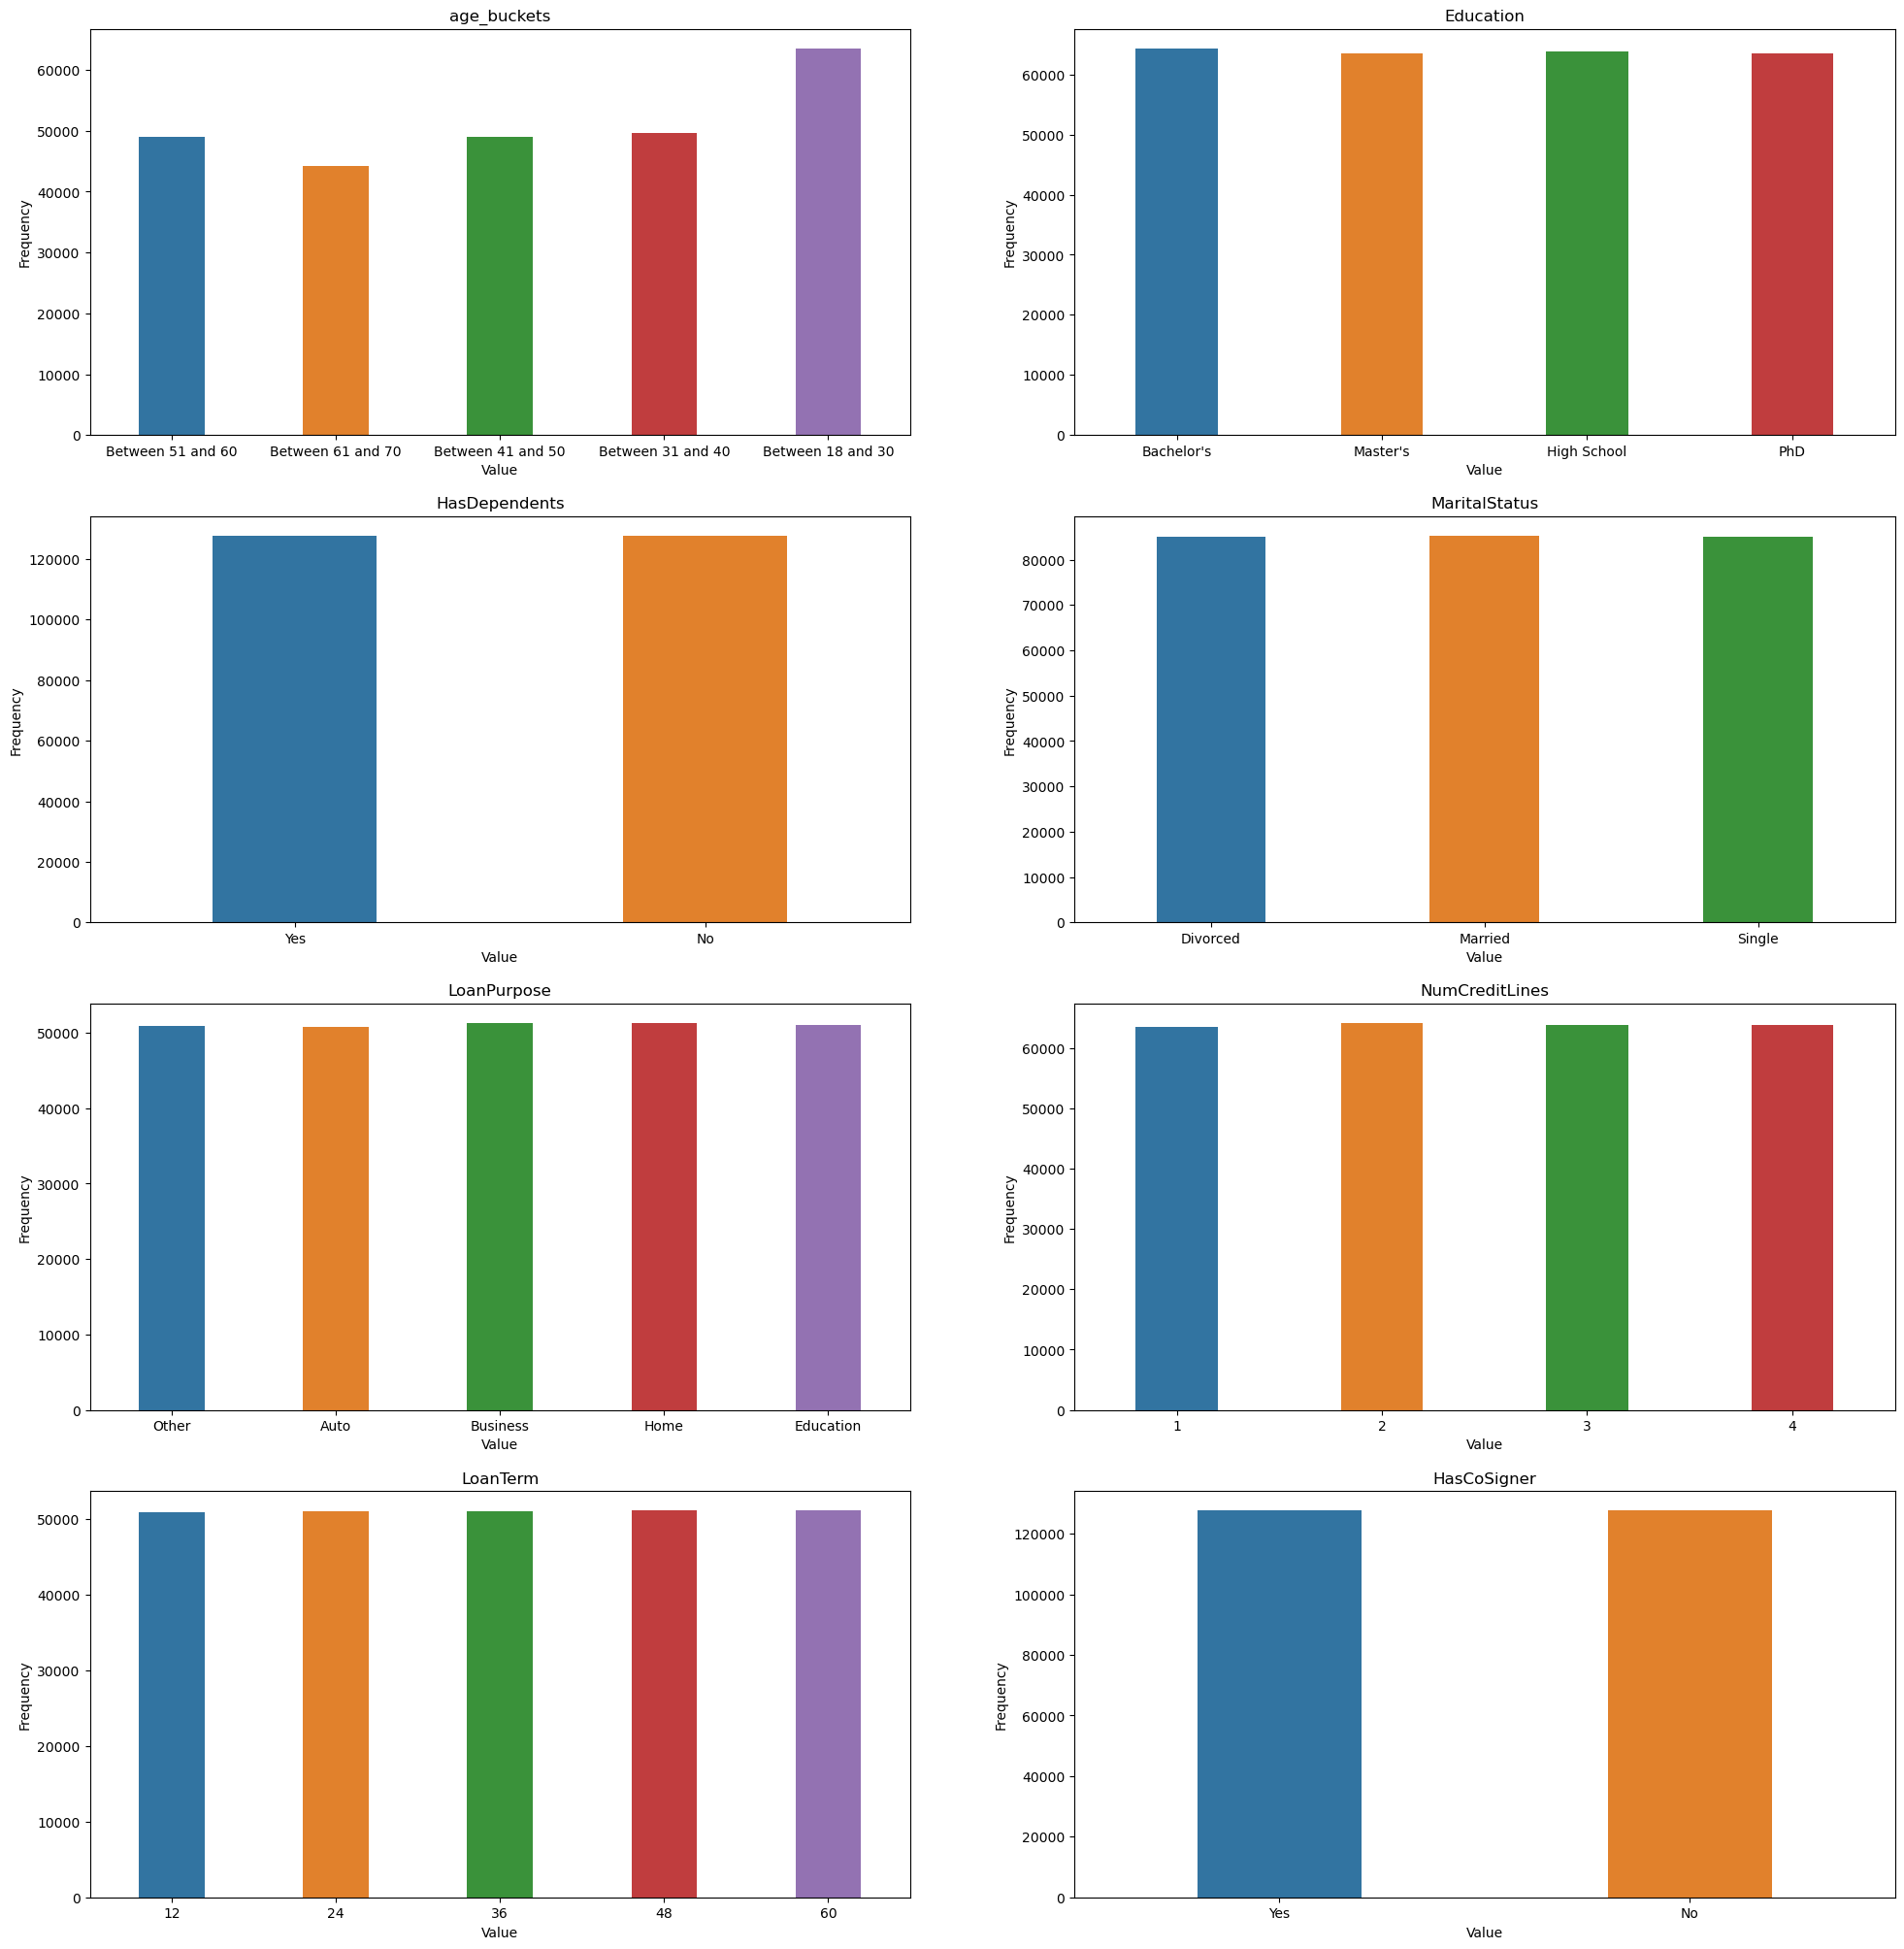

In [12]:
print("Countplot for numerical features:")
plt.figure(figsize=(24,25))
countplot_features = ['age_buckets','Education','HasDependents','MaritalStatus','LoanPurpose','NumCreditLines','LoanTerm','HasCoSigner']
for i, column in enumerate(countplot_features):
    plt.subplot(4,2, i + 1)
    sns.countplot(x=df[column], width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observation:

There are more users in the age bucket "Between 18 and 30". For remaining columns, the values are almost equally distributed.

Boxplot for numerical features:


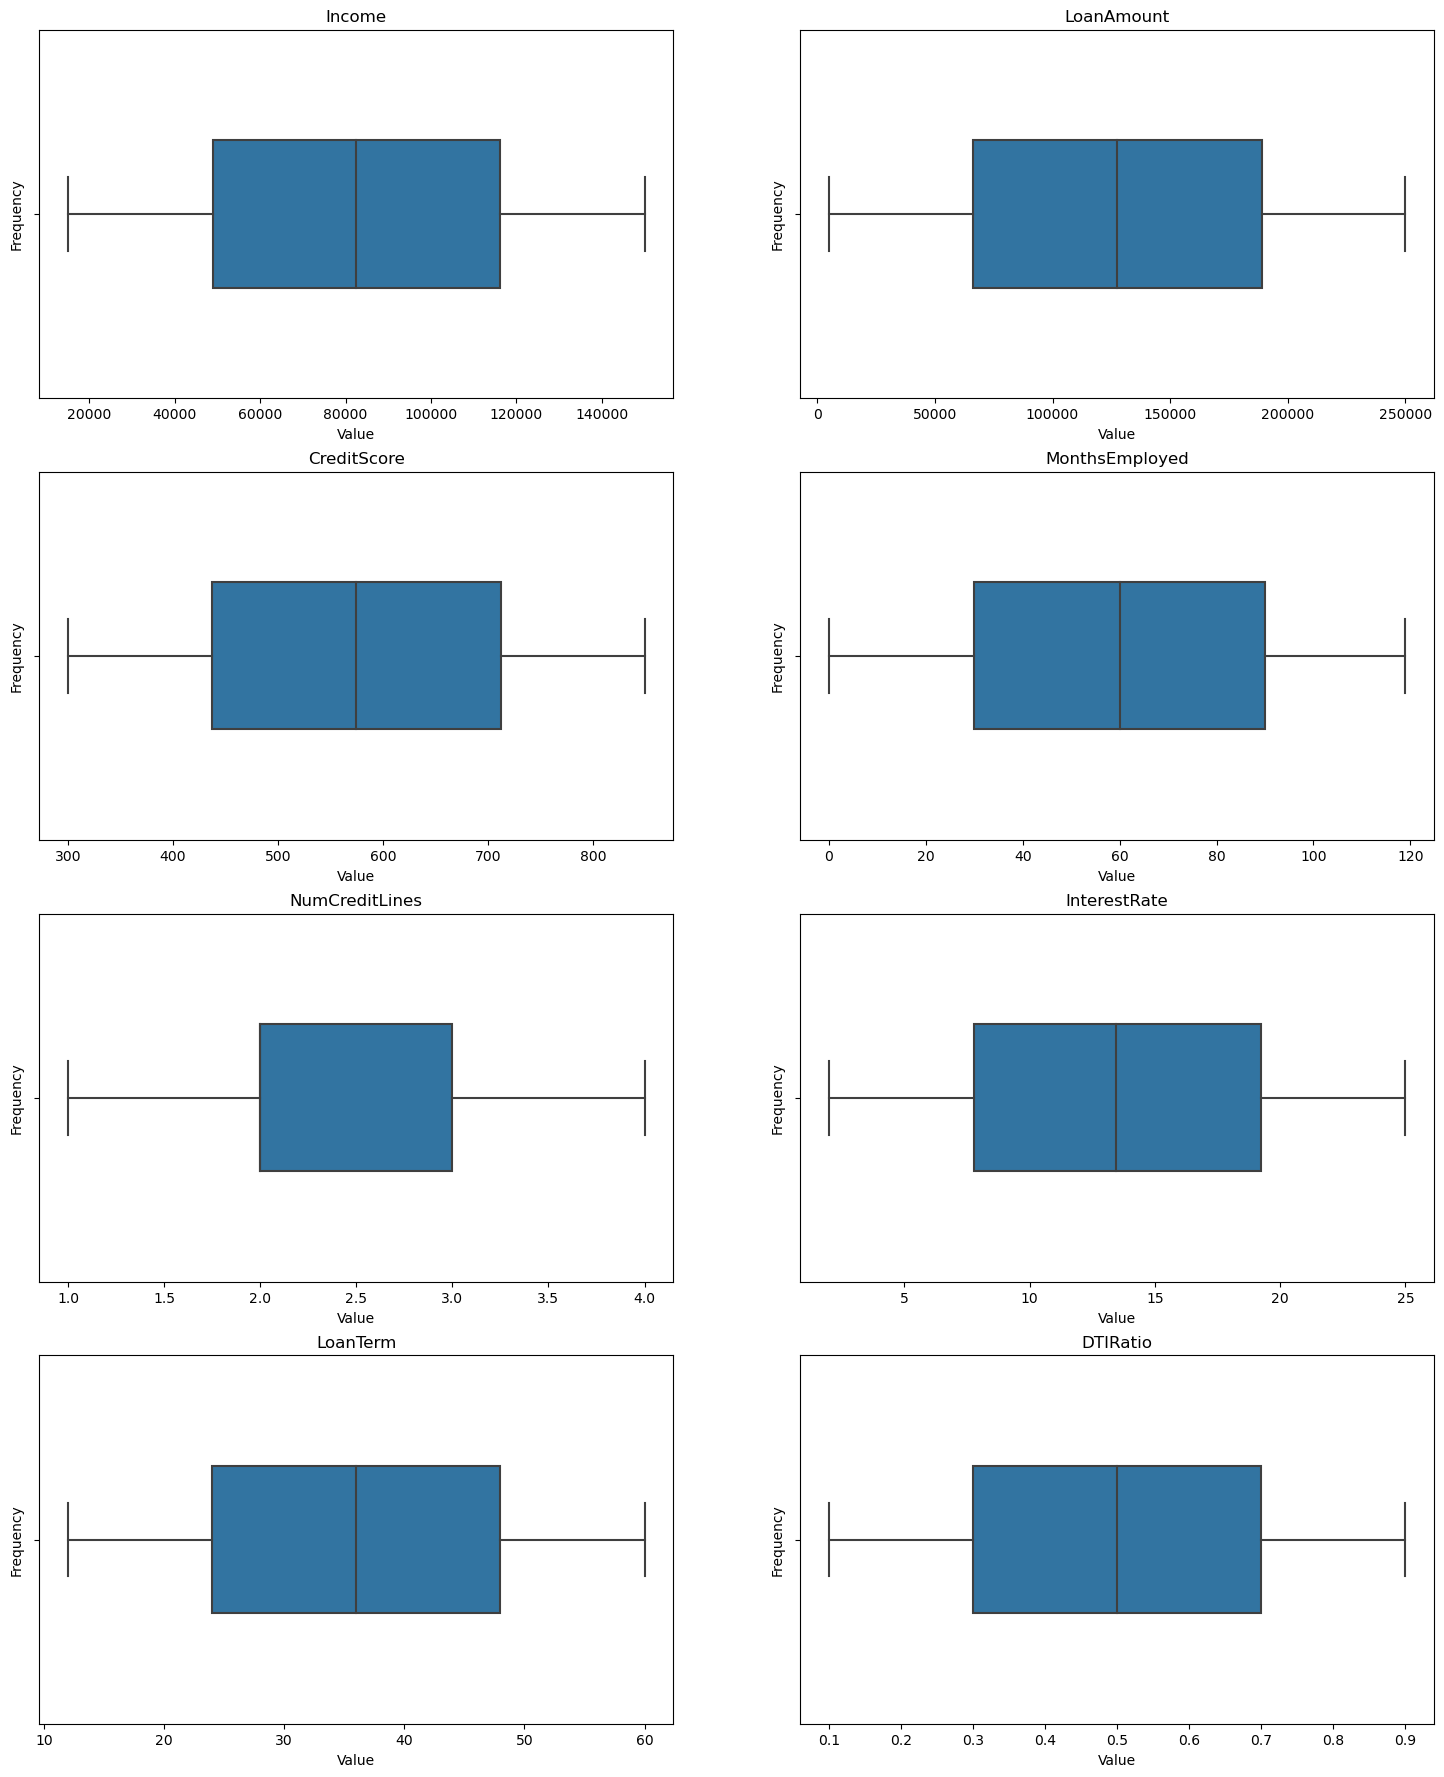

In [13]:
print("Boxplot for numerical features:")

boxplot_features = ['Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']
plt.figure(figsize=(18, 22))
for i, column in enumerate(boxplot_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[column], width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observation:

There aren't any noticable outliers for any of the features.

## Feature Engineering

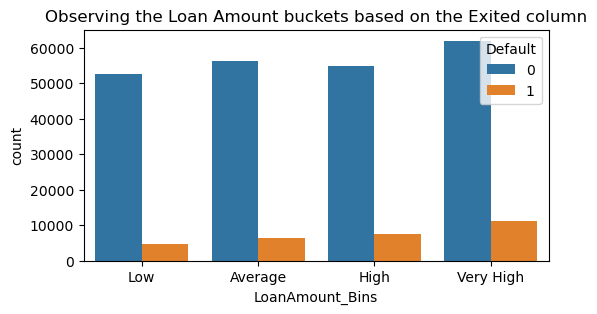

In [14]:
bins = [0,60000,120000,180000, float('inf')]
labels = ['Low','Average','High','Very High']

df['LoanAmount_Bins'] = pd.cut(df['LoanAmount'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'LoanAmount_Bins', hue = 'Default', data = df)
plt.title('Observing the Loan Amount buckets based on the Exited column')
plt.show()

#### Observation:

People with Average, High, and Cery High loan amounts have defaulted as compared to lower amounts

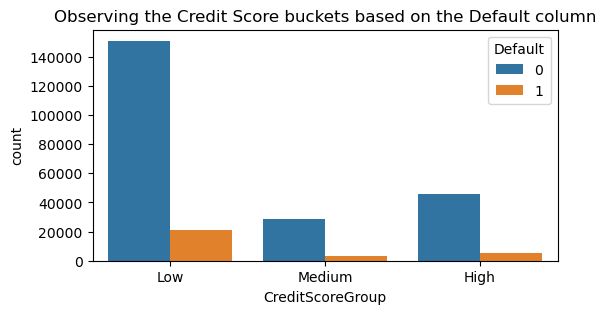

In [15]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Default', data = df)
plt.title('Observing the Credit Score buckets based on the Default column')
plt.show()

#### Observation:

People with Low Credit Scores have defaulted their loans a lot more in comparison to people with Medium and High Credit Scores

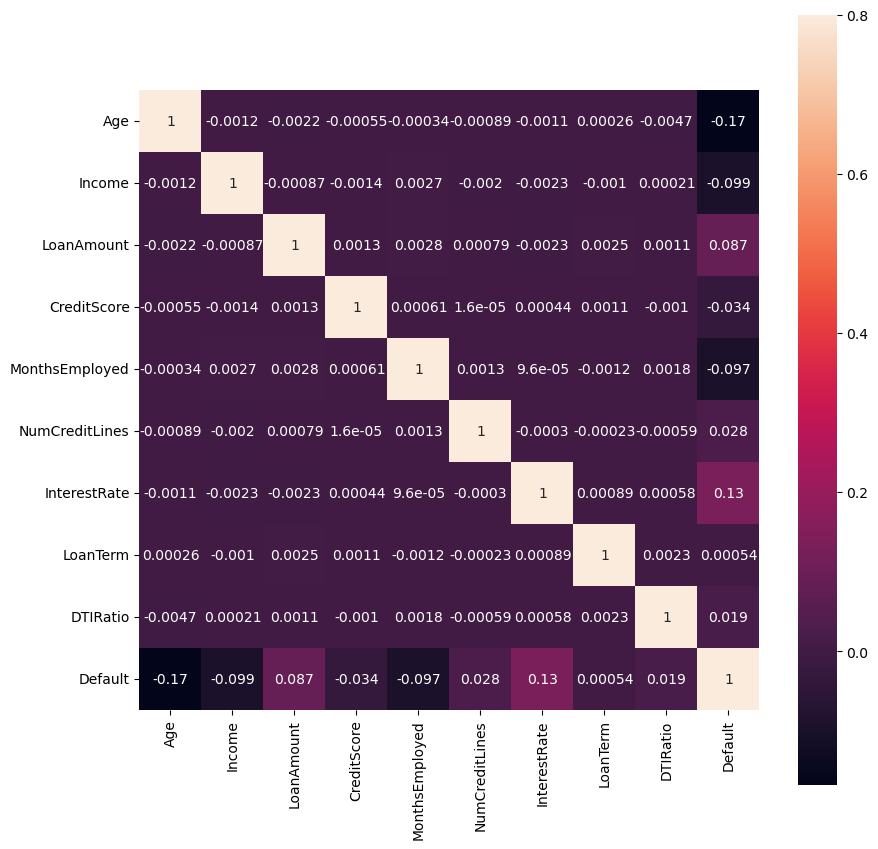

In [16]:
corr_matrix = df.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, vmax=.8, square=True,annot=True);

#### Observation:

The heatmap shows correlations between variables in a home loan dataset:

1. **Loan Amount and Income**: Moderately positive correlation suggests higher incomes are associated with larger loan amounts.
2. **Default and Months Employed**: Negative correlation implies that longer employment is associated with a lower risk of default.
3. **Default and Age**: Negative correlation indicates younger applicants may be at a higher risk of default.
4. **Interest Rate and Credit Score**: Negative correlation suggests that better credit scores may lead to lower interest rates.
5. **Loan Term and Number of Credit Lines**: Slight positive correlation could mean longer loan terms are associated with having more credit lines.

In [17]:
target_correlations = corr_matrix['Default']
print(target_correlations)

Age              -0.167783
Income           -0.099119
LoanAmount        0.086659
CreditScore      -0.034166
MonthsEmployed   -0.097374
NumCreditLines    0.028330
InterestRate      0.131273
LoanTerm          0.000545
DTIRatio          0.019236
Default           1.000000
Name: Default, dtype: float64


#### Observation:

1. **Age**: A moderate negative correlation (-0.17) with defaulting suggests younger applicants are more likely to default.
2. **Income** and **Months Employed**: Both have a small negative correlation with defaulting (-0.10 and -0.097, respectively), indicating that higher income and longer employment might reduce the likelihood of default.
3. **Loan Amount**: A small positive correlation (0.087) with defaulting, suggesting higher loan amounts could be slightly associated with an increased risk of default.
4. **Credit Score**: A small negative correlation (-0.034) with defaulting, implying better credit scores are associated with a lower risk of default.
5. **NumCreditLines**: A very small positive correlation (0.028) with defaulting, indicating a slight increase in default risk with more credit lines.
6. **Interest Rate**: A moderate positive correlation (0.13) with defaulting, suggesting higher interest rates may be associated with higher default rates.
7. **Loan Term** and **DTIRatio**: Very small positive correlations with defaulting (0.0005 and 0.019, respectively), indicating negligible effects on the likelihood of default.

In [18]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_buckets,LoanAmount_Bins,CreditScoreGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Full-time,Divorced,Yes,Yes,Other,Yes,0,Between 51 and 60,Low,Low
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Full-time,Married,No,No,Other,Yes,0,Between 61 and 70,High,Low
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Unemployed,Divorced,Yes,Yes,Auto,No,1,Between 41 and 50,High,Low
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Full-time,Married,No,No,Business,No,0,Between 31 and 40,Low,High
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Unemployed,Divorced,No,Yes,Auto,No,0,Between 51 and 60,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,...,Full-time,Married,No,No,Other,No,0,Between 18 and 30,Very High,Low
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,...,Part-time,Divorced,No,No,Home,No,1,Between 31 and 40,Very High,Low
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,...,Self-employed,Married,Yes,Yes,Auto,Yes,0,Between 51 and 60,Very High,Low
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,...,Part-time,Single,Yes,Yes,Other,No,0,Between 41 and 50,Average,High


## Modeling

In [19]:
cat_columns = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','age_buckets','LoanAmount_Bins','CreditScoreGroup']
print("Observing the categorical column disribution before encoding: \n")

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_columns:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Observing the categorical column disribution before encoding: 

Education 

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64 

EmploymentType 

Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64 

MaritalStatus 

Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64 

HasMortgage 

Yes    127677
No     127670
Name: HasMortgage, dtype: int64 

HasDependents 

Yes    127742
No     127605
Name: HasDependents, dtype: int64 

LoanPurpose 

Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64 

HasCoSigner 

Yes    127701
No     127646
Name: HasCoSigner, dtype: int64 

age_buckets 

Between 18 and 30    63577
Between 31 and 40    49593
Between 41 and 50    49003
Between 51 and 60    4

In [20]:
encoder = LabelEncoder()

for columns in cat_columns:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_columns:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Education 

0    64366
1    63903
2    63541
3    63537
Name: Education, dtype: int64 

EmploymentType 

1    64161
3    63824
2    63706
0    63656
Name: EmploymentType, dtype: int64 

MaritalStatus 

1    85302
0    85033
2    85012
Name: MaritalStatus, dtype: int64 

HasMortgage 

1    127677
0    127670
Name: HasMortgage, dtype: int64 

HasDependents 

1    127742
0    127605
Name: HasDependents, dtype: int64 

LoanPurpose 

1    51298
3    51286
2    51005
4    50914
0    50844
Name: LoanPurpose, dtype: int64 

HasCoSigner 

1    127701
0    127646
Name: HasCoSigner, dtype: int64 

age_buckets 

0    63577
1    49593
2    49003
3    48972
4    44202
Name: age_buckets, dtype: int64 

LoanAmount_Bins 

3    73205
0    62466
1    62338
2    57338
Name: LoanAmount_Bins, dtype: int64 

CreditScoreGroup 

1    172070
0     51204
2     32073
Name: CreditScoreGroup, dtype: int64 



In [21]:
col_drop = ['LoanID','Default']
X = df.drop(col_drop, axis=1)
y = df['Default']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (191510, 19)
y_train: (191510,)
x_test: (63837, 19)
y_test: (63837,)


In [22]:
scaling_columns = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

scaler = StandardScaler()
scaler.fit(x_train[scaling_columns])

x_train[scaling_columns] = scaler.transform(x_train[scaling_columns])
x_test[scaling_columns] = scaler.transform(x_test[scaling_columns])

In [23]:
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

results_df = pd.DataFrame(columns=['Model','Accuracy','Recall Score','F1 Score','ROC AUC Score'])

lb = LabelBinarizer()
lb.fit(y_train)

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred),'\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred),'\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy} \n")
    
    recall = recall_score(y_test, y_pred, pos_label=1)
    print(f"Recall Score: {recall}")

    f1 = f1_score(lb.transform(y_test), lb.transform(y_pred), pos_label=1)
    print(f"F1 Score: {f1}")
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(lb.transform(y_test), model.predict_proba(x_test)[:, 1])
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy, 'Recall Score': recall, 'F1 Score': f1, 'ROC AUC Score': roc_auc}, ignore_index=True)
    
    print("-" * 50,'\n')

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.61      0.03      0.06      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.51      0.50     63837
weighted avg       0.85      0.89      0.84     63837
 

Confusion Matrix:
[[56263   147]
 [ 7193   234]] 

Accuracy Score: 0.8850196594451494 

Recall Score: 0.03150666487141511
F1 Score: 0.05993852459016394
ROC AUC Score: 0.7470487918965063
-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.45      0.06      0.10      7427

    accuracy                           0.88     63837
   macro avg       0.67      0.52      0.52     63837
weighted avg       0.84      0.88      0.84     63837
 

Confusion Matrix:
[[55865   545]
 [ 6989   438]] 

Accu

In [24]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.885020,0.031507,0.059939,0.747049
1,Random Forest,0.881981,0.058974,0.104162,0.668864
2,Decision Tree,0.815655,0.194695,0.197271,0.546053


#### Observations:

1. **Logistic Regression** has the highest accuracy (**88.5%**) and the highest ROC AUC Score (**0.747**), suggesting it is quite good at classifying but not as sensitive in detecting the positive class (**low recall**).
2. **Random Forest** has slightly lower accuracy (**88.2%**) and ROC AUC Score (**0.669**) compared to Logistic Regression. Its recall and F1 score are higher than those for Logistic Regression, which means it's better at identifying the positive class but overall it makes more mistakes.
3. **Decision Tree** has the lowest accuracy (**81.5%**) and ROC AUC Score (**0.546**), which indicates it is not as good at distinguishing between classes as the other models. However, it has the highest recall (**19.49%**), suggesting it's better at identifying the positive class than the other models, but this comes at the cost of making more overall prediction errors.

Let's try and improve the model...

## Using RandomForest to get important features

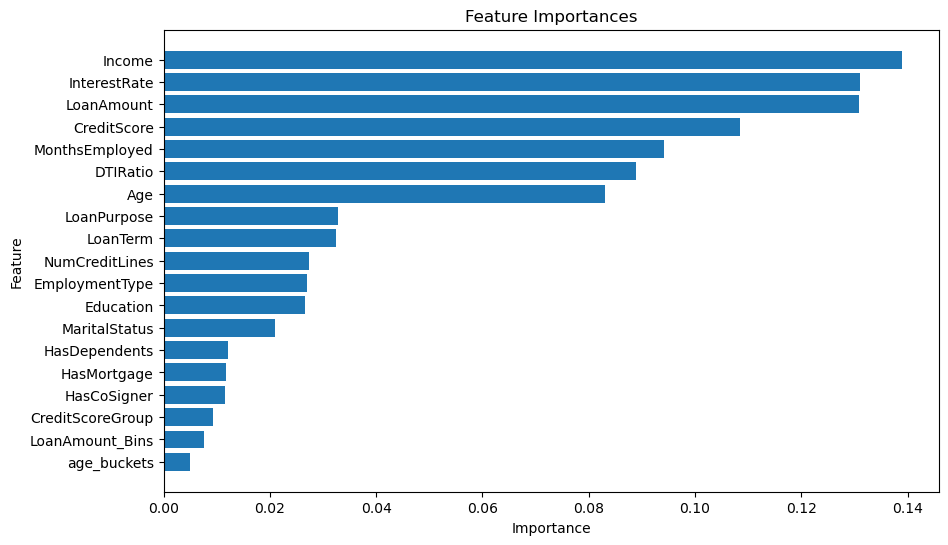

In [25]:
x2 = df.drop(['LoanID','Default'], axis=1)
y2 = df['Default']

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(x2, y2)
feature_importances = rf_regressor.feature_importances_


importance_df = pd.DataFrame({'Feature': x2.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [26]:
importance_df

,Feature,Importance
1,Income,0.138846
6,InterestRate,0.131050
2,LoanAmount,0.130895
3,CreditScore,0.108418
4,MonthsEmployed,0.094158
8,DTIRatio,0.088943
0,Age,0.083035
14,LoanPurpose,0.032826
7,LoanTerm,0.032396
5,NumCreditLines,0.027327


#### Observation:

There are a lot of features with low importance. Let's select features with an importance greater than 0.03, which seems like a reasonable cutoff based on the given importances. 

In [27]:
selected_features = ['Income', 'InterestRate', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'DTIRatio', 'Age', 'LoanPurpose', 'LoanTerm']

selected_df = df[selected_features]

x_train2, x_test2, y_train2, y_test2 = train_test_split(selected_df,df['Default'],test_size=0.25,random_state=42)

print('x_train2:',x_train2.shape)
print('y_train2:',y_train2.shape)
print('x_test2:',x_test2.shape)
print('y_test2:',y_test2.shape)

x_train2: (191510, 9)
y_train2: (191510,)
x_test2: (63837, 9)
y_test2: (63837,)


In [28]:
scaling_columns_2 = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','LoanTerm','DTIRatio']

scaler = StandardScaler()
scaler.fit(x_train[scaling_columns_2])

x_train2[scaling_columns_2] = scaler.transform(x_train2[scaling_columns_2])
x_test2[scaling_columns_2] = scaler.transform(x_test2[scaling_columns_2])

In [29]:
models2 = {
    'Logistic Regression': LogisticRegression(random_state = 42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

results_df2 = pd.DataFrame(columns=['Model','Accuracy','Recall Score','F1 Score','ROC AUC Score'])

lb = LabelBinarizer()
lb.fit(y_train2)

for name, model in models2.items():
    print(f"Model: {name}")
    
    model.fit(x_train2, y_train2)
    y_pred2 = model.predict(x_test2)
    print(classification_report(y_test2, y_pred2),'\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test2, y_pred2),'\n')
    
    accuracy_2 = accuracy_score(y_test2, y_pred2)
    print(f"Accuracy Score: {accuracy_2} \n")
    
    recall_2 = recall_score(y_test2, y_pred2, pos_label=1)
    print(f"Recall Score: {recall_2}")

    f1_2 = f1_score(lb.transform(y_test2), lb.transform(y_pred2), pos_label=1)
    print(f"F1 Score: {f1_2}")
    
    if hasattr(model, "predict_proba"):
        roc_auc_2 = roc_auc_score(lb.transform(y_test2), model.predict_proba(x_test2)[:, 1])
        print(f"ROC AUC Score: {roc_auc_2}")
    else:
        roc_auc_2 = None
    
    results_df2 = results_df2.append({'Model': name, 'Accuracy': accuracy_2, 'Recall Score': recall_2, 'F1 Score': f1_2, 'ROC AUC Score': roc_auc_2}, ignore_index=True)
    
    print("-" * 50,'\n')

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     56410
           1       0.21      0.66      0.32      7427

    accuracy                           0.67     63837
   macro avg       0.57      0.66      0.55     63837
weighted avg       0.85      0.67      0.73     63837
 

Confusion Matrix:
[[38041 18369]
 [ 2558  4869]] 

Accuracy Score: 0.6721807102464088 

Recall Score: 0.6555809882859835
F1 Score: 0.3175607369965759
ROC AUC Score: 0.7257385893977156
-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.43      0.04      0.08      7427

    accuracy                           0.88     63837
   macro avg       0.66      0.52      0.51     63837
weighted avg       0.83      0.88      0.84     63837
 

Confusion Matrix:
[[55962   448]
 [ 7094   333]] 

Accura

In [30]:
results_df2

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.672181,0.655581,0.317561,0.725739
1,Random Forest,0.881855,0.044836,0.081140,0.655326
2,Decision Tree,0.816172,0.200619,0.202514,0.548918


#### Observation:

By selecting important features using RandomForestRegressor, we can observe some changes in the model performance metrics:

1. Accuracy:
   - **Logistic Regression** had a decrease in accuracy from 0.885020 to 0.672181, indicating that the model is now correctly predicting a lower percentage of the total observations
   - **Random Forest** had a marginal decrease from 0.881981 to 0.881855. The model's overall prediction accuracy remains relatively unchanged
   - **Decision Tree** had a marginal increase from 0.815655 to 0.816172. The overall prediction accuracy of the model remains relatively unchanged

2. Recall:
   - **Logistic Regression** had a significant increase from 0.031507 to 0.655581. This means that the model is now much better at identifying true positives
   - **Random Forest** had a decrease  from 0.058974 to 0.044836. The model is now slightly worse at identifying true positives
   - **Decision Tree** had a slight increase from 0.194695 to 0.200619. The model is now slightly better at identifying true positives

3. F1 score:
   - **Logistic Regression** had a steep rise  from 0.059939 to 0.317561, suggesting that the balance between precision and recall has improved, resulting in a higher F1 score
   - **Random Forest** and **Decision Tree** had a slight increase indicating a slight improvement in the balance between precision and recall

4. ROC AUC Score:
   - **Logistic Regression** and **Random Forest** had a slight decrease indicating a slight decrease in the model's ability to distinguish between the positive and negative classes
   - **Decision Tree** had a slight increasing from 0.546053 to 0.548918, suggesting a slight improvement in the model's ability to distinguish between the positive and negative classes

#### Overall:

The feature selection using RandomForestRegressor has led to a significant improvement in the recall score for Logistic Regression, indicating that the model is now better at identifying the positive class. 

However, this improvement comes at the cost of reduced accuracy. The Random Forest model saw a slight decrease in performance across all metrics, while the Decision Tree model saw marginal improvements. Overall, the changes in model performance after feature selection suggest that the selected features have a more significant impact on the Logistic Regression model's ability to identify the positive class.